In [1]:
from src.utils import plot_wav, get_path, load_audio_data, display_mfccs, save_data, load_dataset
from src.features import extract_mfccs

In [2]:
train_folder_path = get_path('data', 'train_audio_files_8k')

In [3]:
%%time
audio_data_list = load_audio_data(train_folder_path)

Wall time: 3min 43s


In [4]:
# plot_wav(audio_data_list[0])

In [4]:
%%time
audio_data_list = extract_mfccs(audio_data_list, max_mfccs_length=50)

Wall time: 23.2 s


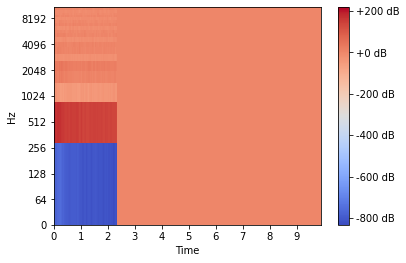

In [6]:
display_mfccs(audio_data_list[0])

In [5]:
save_data(get_path('data', 'npy', 'audio_data.npy'), audio_data_list)

In [9]:
import pandas as pd
df = pd.read_csv(get_path('data', 'metadata_train_challenge.csv'))

In [10]:
from src.adapter import adapt_to_dataset

In [11]:
dataset = adapt_to_dataset(df, audio_data_list)

KeyError: '3284bcf1-2446-4f3a-ac66-14c76b294177.wav'

In [ ]:
dataset

DataSet(Sample(len=1199), is_train=True)

In [12]:
dataset.samples[0]

Sample(uuid='3284bcf1-2446-4f3a-ac66-14c76b294177', subject_gender='male', subject_age=23.0, assessment_result=0, audio_data=AudioData(name='3284bcf1-2446-4f3a-ac66-14c76b294177.wav', features=AudioFeatures(wav=array(shape=(126069,), dtype=float32), mfccs=array(shape=(20, 3833), dtype=float32)), sampling_rate=22050))

In [13]:
from src.preprocess import normalize_audio

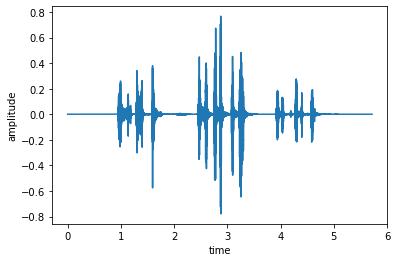

In [15]:
plot_wav(dataset.samples[0].audio_data)

In [16]:
sample = normalize_audio(dataset.samples[0])

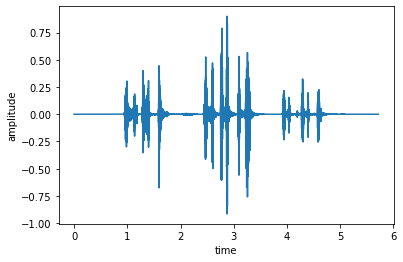

In [17]:
plot_wav(sample.audio_data)

In [16]:
save_data(get_path('data','npy', 'dataset.npy'), dataset)

In [17]:
# audio_data_list = load_audio_data(get_path('data', 'npy', 'audio_data.npy'), load_from_npy=True)
# dataset = load_dataset(get_path('data', 'npy', 'dataset.npy'))